# Computational Essay: Quantum Dot Charge Qubits in Semiconductors

**Samuel Shelton z5359712**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import constants
from matplotlib.animation import FuncAnimation
from IPython import display
from matplotlib.gridspec import GridSpec

from datetime import datetime
print('This cell last executed at: ', datetime.now())

This cell last executed at:  2023-04-23 12:44:06.770651


**Notes for Marking**

I have - quite painstakingly - animated a lot of the graphs in this report. These are lost if you just view the PDF, and the animations are stored and displayed in HTML (so if you view the notebook in, say, Pycharm they may be lost).

In order to make everything work for you, please run this Notebook unising an Annaconda Kernal in Jupyter Lab/Notebook and install [FFmpeg](https://ffmpeg.org/). You might already have FFmpeg installed, but if not the following commands should help.

Some guidance on some possible bugs is [here](https://www.tutorialspoint.com/how-to-properly-enable-ffmpeg-for-matplotlib-animation), but for me it was just one console command on both macOS and windows. IPython is also required, although you *should* already have this. If not, Conda install IPython.

At multiple points I suggest playing with the cells. This only works if you rerun all cells in order first, and some of them take quite a while. If you have a less beefy PC than me (or just any latpop at all), I recommend turning down the number of nodes and timesteps. You can pretty safely half them (or even chop of a factor of 10). 'Timesteps' for animations are typically controlled by a 'frames' or 'repeats'varaible, which should be defined close to the nodes varaible.

{defining a LaTeX command for bra/ket notation - ignore any errors you see}

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Introduction & Background

In this report, we will:

1) Investigate the Generalised two-level Qunatum System

2) Construct a toy system with a single parabolic potential, controlling the energy gap between the ground and first excited states with the potential strength

3) Evolve this toy system into a double Quantum dot, watch how the system behaves with different dot-to-dot seperations

4) Apply a fixed magnetic field $V(x) = F x$ and watch how the system behaves accross various values of $F$

5) Replace this with a time-dependant magnetic field (Rabi Oscillations), and watch how the system behaves and how qubit readouts would behave

Qubits are the quantum computing equivilent of a classical bit. Instead of existing in two states ('on' and 'off' - or 'high' and 'low'), they exist as a superposition of two states ($a \ket{1} + b \ket{0}$). Instead of a switch being either on or off, the Qubit will be in a superposition.

At UNSW, the focus of research is on Quantum computing in sillicon (what goes on in the Newton Building), and that is what this report focuses on. In a silicon Quantum computer, qubits are manufactured using traditional semiconductor manufacturing techniques (photolithography) on dopped silicon wafers (like non-quantum computer microchips).

### Part A) Formalism of the Generalised two-level System

A general two-level system is a Quantum system that exists as a superpoition of two independant - but, crucually, observable / physically distinguishable - states. Examples of a two level system include Electron Spin in the Stern-Gerlach experiment, and (as we will investigate) Quantum Dots. A generalised, two-level system can be described by the following Hamiltonian:

$$
H = \begin{bmatrix}
E & t \\
t^* & -E 
\end{bmatrix}
$$

This  can be trivially derived from a linear combination of the Pauli spin matrices. By inspection, this Matrix is Hermition, which is as we should expect if it is to correspond to any kind of physical observable. There are multiple ways to reformulate this Hamiltonian with slightly different variables (as you might recall from some Quantum courses), but they all behave equivilently.

We seek an analytic solution to this Hamiltonian. We will first determine the eigenvalues by solving the characteristic equation as follows:

$$
\left|
\begin{bmatrix}
E - \lambda & t \\
t^* & -E - \lambda
\end{bmatrix}
\right| = 0 
$$
$$
\left( E - \lambda \right) \left( -E - \lambda \right)  - t t^* = 0
$$
$$
E^2 - \lambda^2 + \left| t \right|^2 = 0
$$
$$
\therefore \lambda_1 = \sqrt{E^2 + \left| t \right|^2}, \qquad \lambda_2 = -\sqrt{E^2 + \left| t \right|^2}
$$

For continuety with the question we define $\lambda_1 = E_1$ and $\lambda_2 = E_2$.

We can then plug these back into the definition of Eigenvectors/Values to find the corresponding eigenvectors:

$$
A v = \lambda v, \qquad \therefore \left( A - \lambda \right) v = 0
$$

For $\lambda_1$:

$$
 \left( A - I \lambda_1 \right) v_1 =
\begin{bmatrix}
E - \lambda_1 & t \\
t^* & -E - \lambda_1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix} = \begin{bmatrix}
0 \\
0
\end{bmatrix}
$$
$$
\begin{bmatrix}
E -  \sqrt{E^2 + \left| t \right|^2} & t \\
t^* & -E - \sqrt{E^2 + \left| t \right|^2}
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix} = \begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

There are a couple of different ways to solve this equation, but we will break it up into two simultanious equations and solve for $a$ and $b$ to find $v_1$.

$$
\left( E -  \sqrt{E^2 + \left| t \right|^2} \right) a + b t = 0, \qquad a t^* + \left( - E -  \sqrt{E^2 + \left| t \right|^2} \right) b = 0
$$

From the left and right respectively, we derive the following expressions:
$$
a = \frac{bt}{\sqrt{E^2 + \left| t \right|^2} - E}, \qquad b = \frac{a t^*}{\sqrt{E^2 + \left| t \right|^2} + E}
$$

Substituting our expression for $a$ into our expression for $b$:

$$
b = \frac{\left( \frac{bt}{\sqrt{E^2 + \left| t \right|^2} - E} \right) t^*}{\sqrt{E^2 + \left| t \right|^2} + E} = b \implies b \text{ is independant of variables} \qquad \therefore \text{Set } b = 1
$$

And substituting $b = 1$ into $a$ yields:

$$
a = \frac{t}{\sqrt{E^2 + \left| t \right|^2} - E}
$$

So, therefore, we have:

$$ \lambda_1 = E_1 = \sqrt{E^2 + \left| t \right|^2}, \qquad v_1 = \begin{bmatrix}
\frac{t}{\sqrt{E^2 + \left| t \right|^2} - E} \\
1
\end{bmatrix} = \frac{t}{\sqrt{E^2 + \left| t \right|^2} - E} \ket{0} + \ket{1}
$$

Through a the same method (or by applying symmetry and verifying using the definition of Eigenstuff), we can derive: 

$$ \lambda_2 = E_2 = - \sqrt{E^2 + \left| t \right|^2}, \qquad v_2 = \begin{bmatrix}
\frac{-t}{\sqrt{E^2 + \left| t \right|^2} + E} \\
1
\end{bmatrix} = \frac{-t}{\sqrt{E^2 + \left| t \right|^2} + E} \ket{0} + \ket{1}
$$

Our initial reaction might be to try normalise these coefficients ( i.e., such that for $\psi = a \ket{0} + b \ket{1}$, $1 = \sqrt{a^2 + b^2}$ ), but we won't do that here because its much easier to to this in the code and the analytic result does not nicely simplify.

This is a bit non-trivial, but as $t \rightarrow 0$,  $\ket{\psi_2} \rightarrow \ket{1}$, and vica versa for $\psi_2$. We will need to to sanity check our propability results later.

Lets plot the Eigenvalues as a function of $E$, with an evolving $t$. Here, we are using purely real $t$ for simplicity.

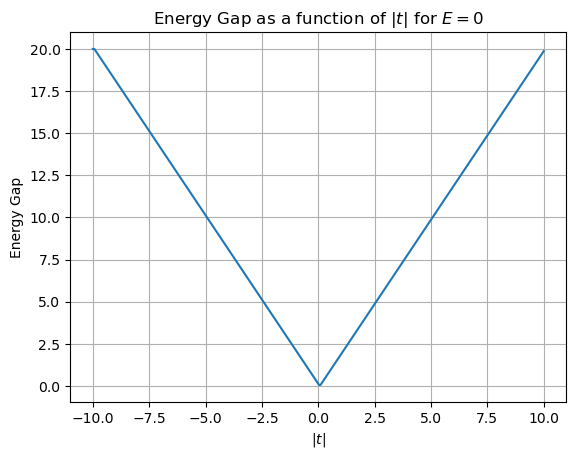

In [4]:
frames = 300

t_space = np.linspace(-10, 10, frames)
E_set = np.linspace(0,20,20)

gaps=[]

def animate(i):
    t = t_space[i]
    E_1 = np.sqrt( np.add( np.power(E_set, 2), np.power(np.absolute(t), 2) ) )
    E_2 = - np.sqrt( np.add( np.power(E_set, 2), np.power(np.absolute(t), 2) ) )
    gap = E_1[0] - E_2[0]; gaps.append(gap)
    E1_line.set_data(E_set, E_1)
    E2_line.set_data(E_set, E_2)
    t_text.set_text('$t =$ {}'.format(round(t,1)))
    
fig, axs = plt.subplots()
axs.grid()
axs.set_title('Eigenvalues as a function of $E$ with evolving $|t|$')
axs.set_xlabel('$E$')
plt.ylim(-20,20)
plt.xlim(0,20)
axs.set_ylabel('Energy Gap / E')
E1_line, = axs.plot([],[], label='$E_1$')
E2_line, = axs.plot([],[], label='$E_2$')
t_text = axs.text(12.6, 1, 'x')
axs.legend(loc=7)

anim = FuncAnimation(fig, animate, frames=frames, interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

plt.title('Energy Gap as a function of $|t|$ for $E=0$')
plt.grid()
plt.xlabel('$|t|$')
plt.ylabel('Energy Gap')
plt.plot(t_space, gaps[:-1])

Now lets plot the probability of measuring $E_1$ or $E_2$ at $\ket{1}$ or $\ket{2}$ as a function of $E$ (and we can evolve this with $t$).

In [5]:
frames = 250
E_list = np.linspace(-5,5,frames)
t_list = np.linspace(-5,5,frames)

def animate(i):
    t = t_list[i]
    E = E_list
    
    psi0 = t / ( np.sqrt(E**2 + np.abs(t)**2) - E )
    psi1 = 1
    
    p0 = psi0**2 / (psi1**2 + psi0**2)
    p1 = psi1**2 / (psi1**2 + psi0**2)
    
    psi10.set_data(E_list, p0)
    psi11.set_data(E_list, p1)
    
    psi0 = -t / ( np.sqrt(E**2 + np.abs(t)**2) + E )
    psi1 = 1
    
    p0 = psi0**2 / (psi1**2 + psi0**2)
    p1 = psi1**2 / (psi1**2 + psi0**2)
    
    psi20.set_data(E_list, p0)
    psi21.set_data(E_list, p1)
    
    plt.suptitle('$t$ = {}'.format(round(t,3)))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
t_text = fig.text(6,4, 'Hi')
    
psi10, = ax1.plot([],[], label='$p_0$')
psi11, = ax1.plot([],[], label='$p_1$')
psi20, = ax2.plot([],[], label='$p_0$')
psi21, = ax2.plot([],[], label='$p_1$')

ax1.set_xlim(-5,5)
ax1.set_ylim(0,1)
ax1.set_xlabel('E')
ax1.set_ylabel('Probability')
ax1.set_title('$\Psi_1$')
ax1.grid(); ax1.legend()

ax2.set_xlim(-5,5)
ax2.set_ylim(0,1)
ax2.set_xlabel('E')
ax2.set_ylabel('Probability')
ax2.set_title('$\Psi_2$')
ax2.grid(); ax2.legend()

plt.tight_layout()

anim = FuncAnimation(fig, animate, frames=frames, interval=50, blit=False)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Now, we wan't to try and build a toy system that mimicks this formal behaviour, such that we can understand how one might go about constructing a Quantum Computing device. In order to do this, we will construct a simulated Quantum Dot. But what is a quantum dot?

### Quantum Dots

A Quantum Dot (in the context of Quantum Computing) is a point charge (electron) trapped in three dimensions by an electrostatic potential (applied, in this case, by a gate with current running through it) in a Sillicon ($^{28}\text{Si}$) lattice, below an insulating, oxidised surface (an $\text{SiO}_2$ layer).

![A Single Qunatum Dot Example](single_QD.png)

>   A Single QD, this Diagram is taken from the tast description

In reality, an implimentation of a QD like that above looks something like this:

![Example from Nature](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature15263/MediaObjects/41586_2015_Article_BFnature15263_Fig1_HTML.jpg?as=webp)

>   A Real Implimentation of a QD, from Veldhorst, M., Yang, C., Hwang, J. et al

You can see the gates highlighted, but the single electron is burried below the surface of the silicon.

In this assignment, we are using a *charge* qubit, where the localisation of the electron within an applied magnetic field gives us our two states (i.e., is the electron localised in the left or right parabolic potential?). Most research is done on *spin* qubits, where the electrons are still trapped in a parabolic potential, but it is the measurement of their spin which gives us the two states (i.e., spin up or down).

## Results & Discussion

### Part B: The Single Quantum Dot

In the simplest model, we seek to solve the Schrodingers equation for $V(x) = \alpha (x - x_1)^2$. Here, $x_1$ is some offset (i.e., the 'zero point' off the potential), and for simplicity (and consistancy across plots), we will set $x_1 = 0$.

This potential is a crude representation of a single charge QD, where the location of an electric charge (an electron) is controlled by applied electromagnetic fields. For just a single QD, there is only one ground state with one possible localisation, but we will see two possible, locally distinct eigenstates with the double qunatum dot.

Because our potential is parabolic, so our imidiate reaction should be to expect a solution that closely resembles that of the analytic solution to the time inndependatn schrodingers equation for the quantum harmonic oscillation.

#### **i)** First, lets simply plot a solution to our potential

Energy Gap = 3.9976875027272016  meV


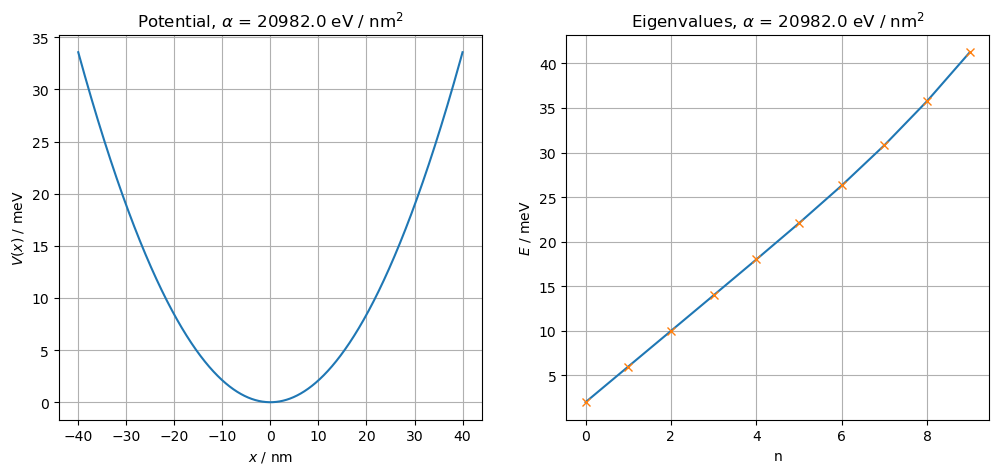

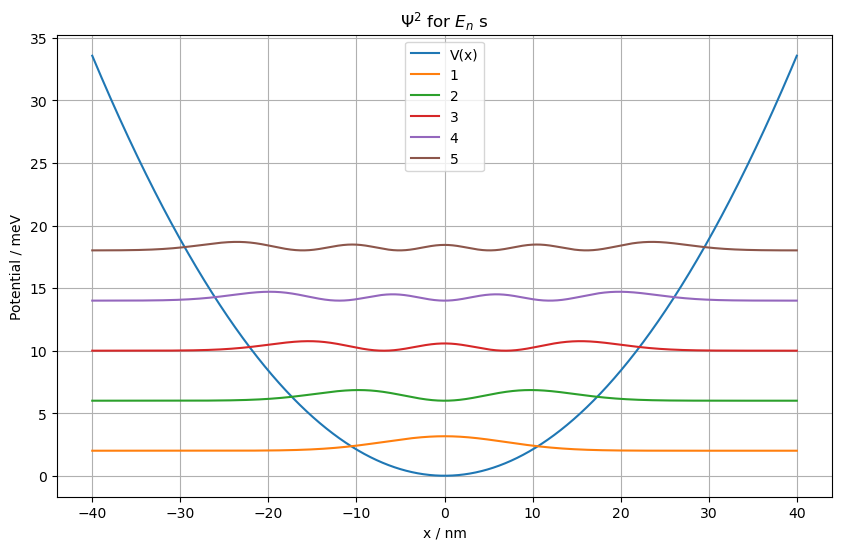

In [6]:
# Bounds and nodes for grid
plot_to = 40 # Bounds in nm
nodes = 4000
alpha = 20982.008208404975  # ev/nm^2

# Plot solutions to Psi over potential to check for issues, set to eigenvalue or 0 for nothing, recomend setting to at least 2
plot_check = 5

# Constants
q = 1.602E-19                   # Electron charge
hbar = 1.054E-34                # Reduced plancks constant
m = 0.2 * 9.109E-31             # Electron mass

Bounds = np.multiply(plot_to, [-1e-9, 1e-9])
X = np.linspace(*Bounds, nodes)
a = plot_to*2E-9/nodes

U = (alpha*1E9)*(X)**2

# Defining the Hamiltonian
t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(nodes)
off=-t0*np.ones(nodes-1)

H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

# Solving the Matrix
vals, vec = np.linalg.eigh(H)
idx = vals.argsort()[::1]   
vals = vals[idx]
vec = vec[:,idx]

#print eigenvalues and energy gaps
Energy_gap=vals[1]-vals[0]
print('Energy Gap =', Energy_gap*1E3,' meV')

# Make Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(X*1E9, U*1E3)
ax1.set_xlabel('$x$ / nm')
ax1.set_ylabel('$V (x)$ / meV')
ax1.set_title('Potential, $\\alpha$ = {} eV / nm$^2$'.format(alpha//1)); ax1.grid()

ax2.plot(vals[:10]*1E3)
ax2.plot(vals[:10]*1E3, marker='x', linestyle='')
ax2.set_xlabel('n')
ax2.set_ylabel('$E$ / meV')
ax2.set_title('Eigenvalues, $\\alpha$ = {} eV / nm$^2$'.format(alpha//1)); ax2.grid()

if plot_check != 0:
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot(X*1E9, U*1E3, label='V(x)')
    for i in range(plot_check):
        plt.plot(X*1E9, (np.multiply(vec[:,i],vec[:,i]) + vals[i])*1E3, label='{}'.format(i+1))
    plt.grid()
    plt.ylabel('Potential / meV')
    plt.xlabel('x / nm')
    plt.legend()
    plt.title('$\Psi^2$ for $E_n$ s')
    plt.show()

This (predictably) looks exactly like our expected analytical solution! The Eigenvalue spacing is linear here (and quantised), exactly inline with the $\hbar \omega$ spacing in the analytical space. Also note the zero point energy of the ground state. Lets have a more detailed look at the two lowest wavefunctions:

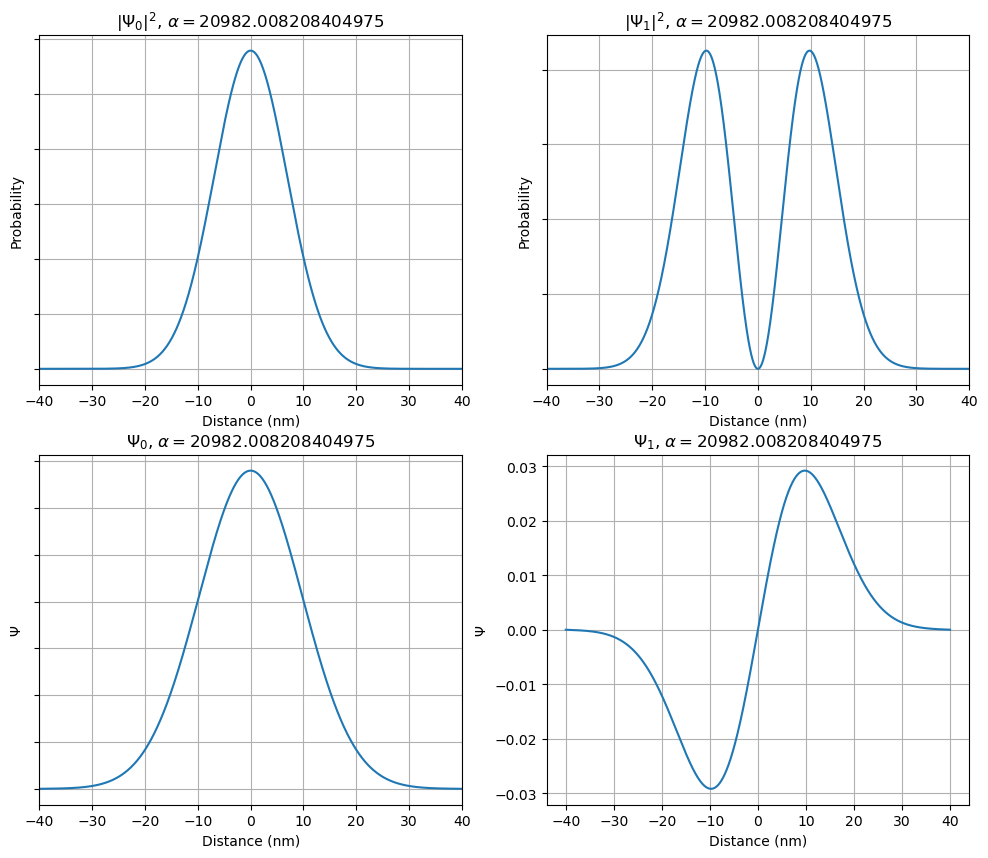

In [7]:
#calculate probabilities
Psi0=np.multiply(vec[:,0],vec[:,0])
Psi1=np.multiply(vec[:,1],vec[:,1])

# X lim for plotting
x_max = 40 #plot_to

# Make Plots
fig, axs = plt.subplots(2, 2, figsize=(12,10))
xlim = np.multiply(x_max, [-1, 1])

axs[0,0].plot(X*1E9, Psi0)
axs[0,0].set_xlabel('Distance (nm)')
axs[0,0].set_ylabel('Probability', )
axs[0,0].set_title('$|\Psi_0|^2$, $\\alpha = ${}'.format(alpha))
axs[0,0].grid(); axs[0,0].set_yticklabels([]), axs[0,0].set_xlim(*xlim)

axs[0,1].plot(X*1E9, Psi1)
axs[0,1].set_xlabel('Distance (nm)')
axs[0,1].set_ylabel('Probability')
axs[0,1].set_title('$|\Psi_1|^2$, $\\alpha = ${}'.format(alpha))
axs[0,1].grid(); axs[0,1].set_yticklabels([]), axs[0,1].set_xlim(*xlim)

axs[1,0].plot(X*1E9, vec[:,0])
axs[1,0].set_xlabel('Distance (nm)')
axs[1,0].set_ylabel('$\Psi$')
axs[1,0].set_title('$\Psi_0$, $\\alpha = ${}'.format(alpha))
axs[1,0].grid(); axs[1,0].set_yticklabels([]), axs[1,0].set_xlim(*xlim)

axs[1,1].plot(X*1E9, vec[:,1])
axs[1,1].set_xlabel('Distance (nm)')
axs[1,1].set_ylabel('$\Psi$')
axs[1,1].set_title('$\Psi_1$, $\\alpha = ${}'.format(alpha))
axs[1,1].grid(); #axs[1,1].set_yticklabels([]), axs[1,1].set_xlim(*xlim)

Very much as expected when compared to the analytic solution.

Lets see how our energy gap varies as a function of $\alpha$, here we will explore a wide range of $\alpha$ using a logarithmic graph.

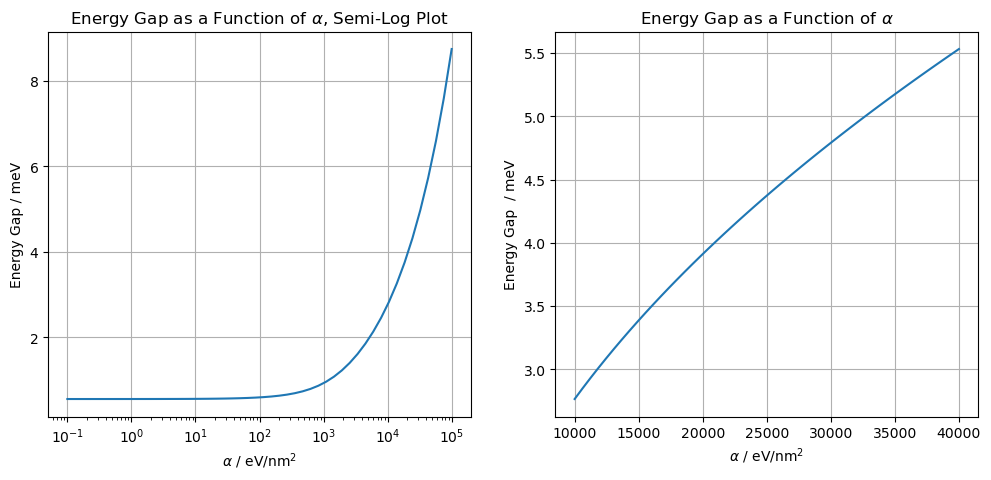

In [8]:
def space_from_alpha(alpha_range):
    
    # Parameters
    bounds = 50
    nodes = 400

    a = bounds*2E-9/nodes
    gap = []
    X=np.multiply(np.linspace(-bounds, bounds, nodes), 1E-9)  #nm

    t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
    on=2.0*t0*np.ones(nodes)
    off=-t0*np.ones(nodes-1)

    for al in alpha_range:
        
        U = al*1E9 * X**2
        H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

        W,V=np.linalg.eig(H)
        idx = W.argsort()[::1]   
        W = W[idx]
        V = V[:,idx]

        Energy_gap=W[1]-W[0]
        gap.append(Energy_gap)
    
    return gap

alpha_log_range = np.logspace(-1, 5, 50)
alpha_lin_range = np.linspace(1E4, 4E4, 50)

alpha_log_out = np.multiply(1E3, space_from_alpha(alpha_log_range)) # in meV
alpha_lin_out = np.multiply(1E3, space_from_alpha(alpha_lin_range)) # in meV

# Make Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.semilogx(alpha_log_range, alpha_log_out)
ax1.set_xlabel('$\\alpha$ / eV/nm$^2$')
ax1.set_ylabel('Energy Gap / meV')
ax1.set_title('Energy Gap as a Function of $\\alpha$, Semi-Log Plot'); ax1.grid()

ax2.plot(alpha_lin_range, alpha_lin_out)
ax2.set_xlabel('$\\alpha$ / eV/nm$^2$')
ax2.set_ylabel('Energy Gap  / meV')
ax2.set_title('Energy Gap as a Function of $\\alpha$'); ax2.grid()

If we wanted to precisely select for $\alpha$ such that $E_1 - E_0 = 4 \text{meV}$, we could refine these results by increasing the resolution of the nodes, then fit a simple curve.

What curve should we use? It looks like something like $\sqrt{\alpha}$ would be appropriate. Does this makes sense? Lets consider the quantum harmonic oscillator, where the potential gives rise to the following energy gap:

$$
V(x) = \frac{1}{2} m \omega^2 x^2 \qquad \implies E_1 - E_0 = \hbar \omega
$$

Here, $\alpha = \frac{1}{2} m \omega^2 x^2$, and if we substitute and rearrange, we find $E_1 - E_0 \propto \sqrt{\alpha}$, which explains our square root relationship. Lets dial in our plot and solve for the desired energy gap.

The best choice for alpha is  20964.0


Text(0, 0.5, 'Energy Gap / meV')

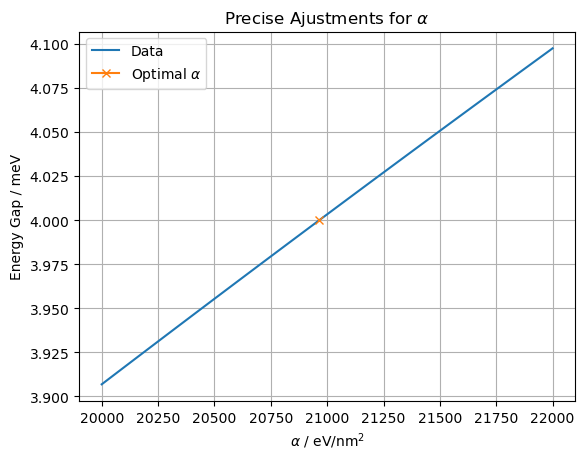

In [9]:
# Dialing it in

def space_from_alpha(alpha_range):
    
    # Parameters
    bounds = 40
    nodes = 800

    a = bounds*2E-9/nodes
    gap = []
    X=np.multiply(np.linspace(-bounds, bounds, nodes), 1E-9)  #nm

    t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
    on=2.0*t0*np.ones(nodes)
    off=-t0*np.ones(nodes-1)

    for al in alpha_range:
        
        U = al*1E9 * X**2
        H=np.diag(on+U)+np.diag(off,1)+np.diag(off,-1)

        W,V=np.linalg.eig(H)
        idx = W.argsort()[::1]   
        W = W[idx]
        V = V[:,idx]

        Energy_gap=W[1]-W[0]
        gap.append(Energy_gap)
    
    return gap

alpha_range = np.linspace(20000, 22000, 30)
y = np.multiply(space_from_alpha(alpha_range), 1E3)

def poly_2(x, A, B):
    y = A + B*(x)**(0.5)
    return y

popt, pcov = scipy.optimize.curve_fit(poly_2, alpha_range, y)

alpha_opt = ((4 - popt[0])/popt[1])**2
print('The best choice for alpha is ',alpha_opt//1)

plt.title('Precise Ajustments for $\\alpha$')
plt.plot(alpha_range, y, label='Data')
plt.grid()
plt.plot(alpha_opt, 4, marker='x', label='Optimal $\\alpha$')
plt.xlabel('$\\alpha$ / eV/nm$^2$')
plt.legend()
plt.ylabel('Energy Gap / meV')

**What is $\alpha$, physically?**

$\alpha$ is the 'strength' of the potential, without any seperate applied electromagnetic field (i.e., Rabi Oscillations). In our Silicon QD device, we could possibly control $\alpha$ through our selection of semiconductor materials (i.e., silicon doping), or by varying the current running through our gates. The structure of the silicon lattice could also have a roll to play.

**At what Temperatures would we expect this system to operate?**

To prevent decoherance (and transitions out of the ground states), thermal fluctuations would have to occure at bellow our energy level split of $4$ meV. Crudely:

$$
k_B T << 4 \text{meV} \qquad \implies T << 46 ^\circ K
$$

This is to cold for people, but for a Quantum computer this is downright toasty. Getting $T \approx << 46 ^\circ K$ would not require exotic and expensive cooling solutions, and is likely very achievable in a commercialised product. Researches have operated similar systems [at around $1^\circ K$](https://www.nature.com/articles/s41586-020-2171-6) (this is UNSW research), but this was using spin Qubits (although confined in a similar potential to what we are modelling).

We can refine our expected temperature when we do the double quantum dot, where we will require temptemperatures such that thermal fluctuations are well below the energy gap of our two degenerate ground states (i.e., our ground states will be very close in energy, on the order of tenths of millivolts). This would require:

$$k_B T << 0.1 \text{meV} \qquad \implies T << 1 K$$

Which is much more inline with existing devices[2] and our expectations.

#### **ii)** But what of Computational Artifacts?

Its all well and good to just plug stuff into the model we have built as we have done so far, but we need to be sure we are not accidentaly brushing over some computational artifacts. We need to check we aren't screwing things but, and - importantly - that the value of our energy gap is actually diverging with increasing resolution (and that we are plotting enough of the potential not to screw things up).

I have already been building in some ways of checking for computational artifacts. There is a variable in the code run so far called 'plot_check.' This plots the first $n$ wavefunction solutions against the potential and allows you to check for any discontinueties that might have arrisen. I have set it to about 5, becuase this is the eignestate range we care about, but feel free to ramp it and deliberatly induce computational artificats (i.e., aritifical confinement).

In order to check that we are plotting enough of the potential, our Eigenvalue plot should be linear for the important Eigenvalues (since we are looking at the lowest handful of energy levels, the first 5 or so eigenvalues should be linear). You can see this trend already on the initial plot, with the plot deviating from linear for the upper eigenvalues (that we aren't interesting in). This linear expectation comes from the analytical solution to the quantum harmonic oscillator.

Lets plot the eigenvalues as we change the total plotted $x$ rage. We need to make sure we use a constant resolution throughout so our test is valid (i.e., we are testing what we are trying to test for, and are not introducing any additional noise).

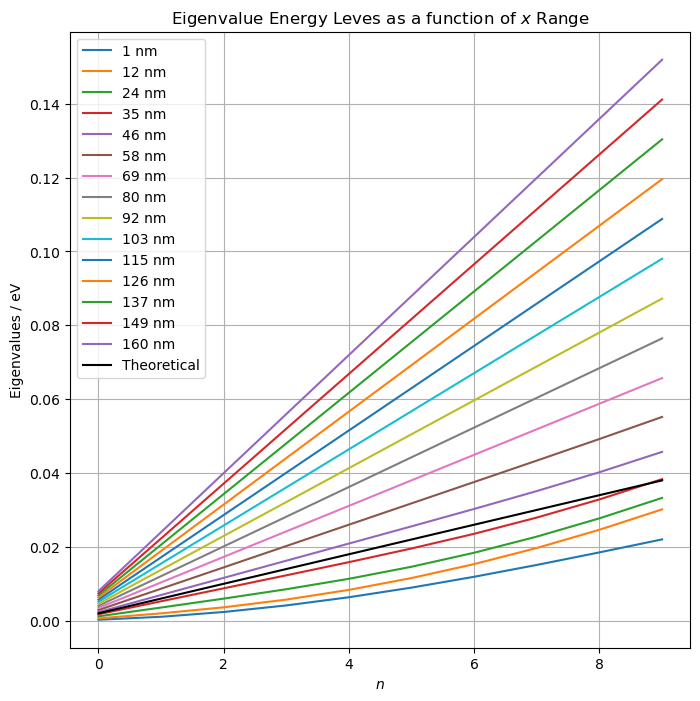

In [10]:
# Bounds and nodes for grid
plot_to = plot_to # Bounds in nm
resolution = 10 #nodes per nm
alpha = alpha # play if you want

iterations = 15

fig, ax1 = plt.subplots(1, figsize=(8,8))
boundary = np.linspace(1, 4*plot_to, iterations)

for i in boundary:

    nodes = 2*round(i)*resolution

    Bounds = np.multiply(i, [-1e-9, 1e-9])
    X = np.linspace(*Bounds, nodes)
    a = plot_to*2E-9/nodes

    U = (alpha*1E9)*(X)**2

    # Defining the Hamiltonian
    t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
    on=2.0*t0*np.ones(nodes)
    off=-t0*np.ones(nodes-1)

    H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

    # Solving the Matrix
    vals, vec = np.linalg.eigh(H)
    idx = vals.argsort()[::1]   
    vals = vals[idx]
    vec = vec[:,idx]

    ax1.plot(vals[:10], label='{} nm'.format(round(i)))

def theoretical(n):
    return (n + 0.5)*0.004

x = np.linspace(0,9,10)
ax1.plot(x, theoretical(x), color='black', label='Theoretical') 

ax1.grid()
ax1.set_xlabel('$n$')
ax1.set_ylabel('Eigenvalues / eV')
ax1.set_title('Eigenvalue Energy Leves as a function of $x$ Range')
ax1.legend()

This graph is not particularly helpful, but there is a lot to talk about here. The theoretical value is derived from $E_n = \left( n + \frac{1}{2} \right) \hbar \omega$, with $\omega = \frac{E_1 - E_0}{\hbar} = \frac{4 meV}{\hbar}$, from the analytic solution to the Quantum Harmonic Oscillator. This data was generated at a constant 'resolution' (in nodes/nm) to try and avoid any dependance on outside factors, but this does not appear to have been successul. This apparent divergance of the zero-point energy *could* have something to do with improper meshing, but this doesn't affect us for our particular values.

Regardless, we are looking for linearity in the early regions of the graph and general matching to the theoretical value. Our selected interval, $40$ nm, fulfills both of these criteria very well, and from our plots of the wavefunctions from before, we can't see any discontinueties or deviations from the expected behaviour to indicate anything like artifical confinement in the lower eigenstates (although for the lower values in this graphs, those curved ends absolutely indicate artificial confinement).

Now lets look for convergance of $\alpha$ as we increase our plotting resolution:

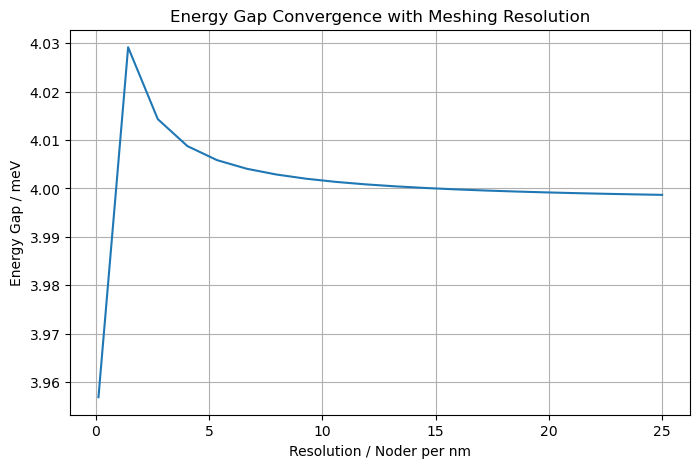

In [11]:
# Bounds and nodes for grid
plot_to = plot_to # Bounds in nm
nodes_max = 2000
alpha = alpha #20982.008208404975  # ev/nm^2

nodes_list = np.linspace(10, nodes_max, 20)
Bounds = np.multiply(plot_to, [-1e-9, 1e-9])

out = []

for i in nodes_list:
    i = round(i)
    
    X = np.linspace(*Bounds, i)
    a = plot_to*2E-9/i

    U = (alpha*1E9)*(X)**2

    # Defining the Hamiltonian
    t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
    on=2.0*t0*np.ones(i)
    off=-t0*np.ones(i-1)

    H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

    # Solving the Matrix
    vals, vec = np.linalg.eigh(H)
    idx = vals.argsort()[::1]   
    vals = vals[idx]
    vec = vec[:,idx]

    Energy_gap=vals[1]-vals[0]
    out.append(Energy_gap)
    
# Make Plots
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(nodes_list/(2*plot_to), np.multiply(out, 1E3))
ax1.set_xlabel('Resolution / Noder per nm')
ax1.set_ylabel('Energy Gap / meV')
ax1.set_title('Energy Gap Convergence with Meshing Resolution'); ax1.grid()

So, there is clearly convergance but law of diminishing returns kicks in quick. Thre are again, no signs of computational artifacts in the regions we are operating in, but clearly using $<250$ nodes (or 3 nodes per nm) leads to some improper meshing and poor results.

#### **iii)** Quantum Dots as Artificial Atoms

Descriptions of Quantum Dots as Artificial Atoms make a lot of sense. In both atoms and QDs, you have delocalised electroc charges that are contained in an electrostatic potential (electrons with wavefunctions), and by adjusting their positioning you can allow them to interact with each other in various ways (analogous to chemical bonding).

When researching atoms, *most* people (obviously not radiochemists or nuclear phycisists) care about how they behave electronically, and through the Born-Oppenheimer approximation we know that the electronic and nuclear wavefunctions can be approximately seperated, so QDs are basically just the electron cloud without a nucleus.

In some [UNSW-relevent research](https://newsroom.unsw.edu.au/news/science-tech/scientists-emulate-nature-quantum-leap-towards-computers-future), the team at Silicon Quantum Computing were able to use Quantum Dots very literally as artificial atoms to simulate the electronic behaviour of the molecule polyacetylene (basically a chain of $(C_2 H_2 )_n$ groups). In this experiment[2], splitting energies were about $3.85 \text{meV}$ and degenerate ground states accross multiple QDs were achieved with energy differences of about $0.1 \text{meV}$ (which is what we will look at with the double qunatum dot next). Temperatures here were between $10$ and $100 \text{mK}$, in line with our estimation from earlier.

For a sence of scale, lets plot our wavefunction from before against that of an analytic solution to the Hydrogen atom. I have applied a scaling factor so that these graphs look remotely comprable, so don't take the absolute values of the y axis as having any significant meaning.

Text(0.5, 1.0, 'Radial PDF for Hydrogen vs Half PDF for $\\Psi_1$')

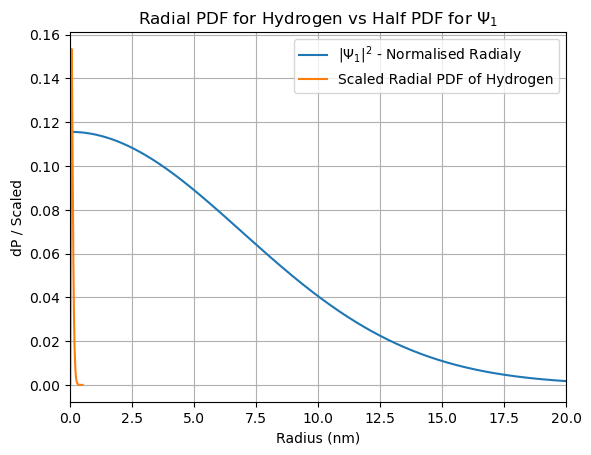

In [84]:
x = np.linspace(-plot_to, plot_to, len(Psi0))
y = Psi0/(0.5*scipy.integrate.simpson(Psi0, x))

x1 = np.linspace(0, 0.5, 400)
a0 = 0.0529
radial_pdf = (4/(a0**3))*(x1**2)*np.exp(-2*x1/a0)
y1 = 0.015*radial_pdf/scipy.integrate.simpson(radial_pdf, x1)

plt.plot(x, y, label='$|\Psi_1|^2$ - Normalised Radialy')
plt.plot(x1, y1, label='Scaled Radial PDF of Hydrogen')


plt.xlabel('Radius (nm)')
plt.ylabel('dP / Scaled')

plt.grid()
plt.legend()
plt.xlim(0, 20)
plt.title('Radial PDF for Hydrogen vs Half PDF for $\Psi_1$')

Clearly there is a big difference in scale. The hydrogen Bohr radius, $a_0 = 0.0529 \text{ nm}$, fits into our electronic PDF (for $4 \text{ meV}$ splitting) about 400 times (not counting the tails).

For a silicon crystal structure with atoms evenly spacced every $0.543 \text{ nm}$, our ground state wavefunction ($\Psi$, not $|\Psi|^2$) would span about $110$ atoms.

### Part C: The Double Quantum Dot

Here we are introducing a second identical potential, with the value of $\alpha$ from before to produce $4 \text{ meV}$ splitting, spaced apart evenly about the zero of the axis by some seperation constant in nanometers.

were are approximating the total potential as the minimum of the two parabolic potentials, so
$$
V (x) =   \text{min } \left\{
\begin{array}{ll}
      \alpha \times \left( x - \frac{\text{seperation}}{2} \right)^2 \\
      \alpha \times \left( x + \frac{\text{seperation}}{2} \right)^2 \\
\end{array} 
\right.
$$



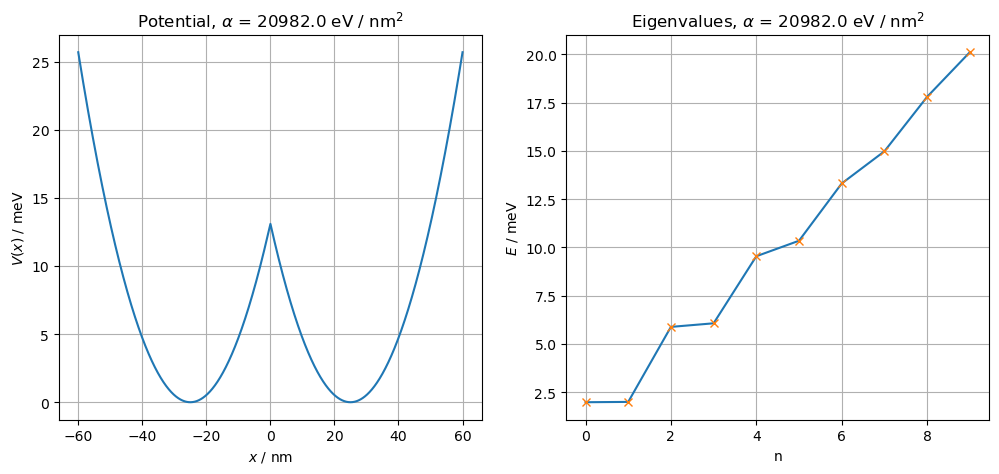

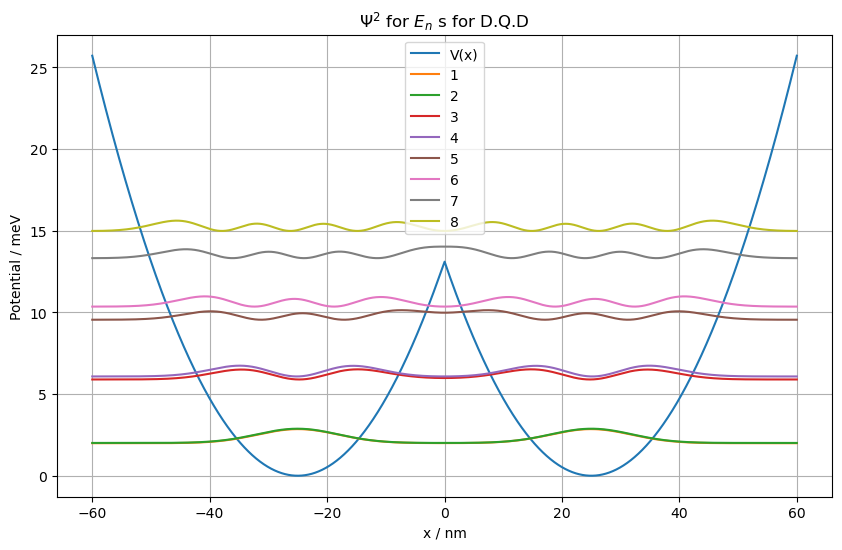

In [87]:
# Bounds and nodes for grid
plot_to = 60 # Bounds in nm
nodes = 4000
alpha = alpha # 20982.008208404975 optimal
seperation = 50 # seperation of quadratics in nm

# Plot solutions to Psi over potential to check for issues, set to eigenvalue or 0 for nothing, recomend setting to at least 2
plot_check = 8

Bounds = np.multiply(plot_to, [-1e-9, 1e-9])
X = np.linspace(*Bounds, nodes)
a = plot_to*2E-9/nodes

U1 = (alpha*1E9)*(X-seperation*0.5E-9)**2
U2 = (alpha*1E9)*(X+seperation*0.5E-9)**2
U = np.minimum(U1, U2)

# Defining the Hamiltonian
t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(nodes)
off=-t0*np.ones(nodes-1)

H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

# Solving the Matrix
vals, vec = np.linalg.eigh(H)
idx = vals.argsort()[::1]   
vals = vals[idx]
vec = vec[:,idx]

#print eigenvalues and energy gaps
Energy_gap=vals[1]-vals[0]
#print('Energy Gap =', Energy_gap*1E3,' meV')

# Make Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(X*1E9, U*1E3)
ax1.set_xlabel('$x$ / nm')
ax1.set_ylabel('$V (x)$ / meV')
ax1.set_title('Potential, $\\alpha$ = {} eV / nm$^2$'.format(alpha//1)); ax1.grid()

ax2.plot(vals[:10]*1E3)
ax2.plot(vals[:10]*1E3, marker='x', linestyle='')
ax2.set_xlabel('n')
ax2.set_ylabel('$E$ / meV')
ax2.set_title('Eigenvalues, $\\alpha$ = {} eV / nm$^2$'.format(alpha//1)); ax2.grid()

if plot_check != 0:
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot(X*1E9, U*1E3, label='V(x)')
    for i in range(plot_check):
        plt.plot(X*1E9, (np.multiply(vec[:,i],vec[:,i]) + vals[i])*1E3, label='{}'.format(i+1))
    plt.grid()
    plt.ylabel('Potential / meV')
    plt.xlabel('x / nm')
    plt.legend()
    plt.title('$\Psi^2$ for $E_n$ s for D.Q.D')
    plt.show()

Now lets explore (and animate) what happens when we change the dot-to-dot seperation.

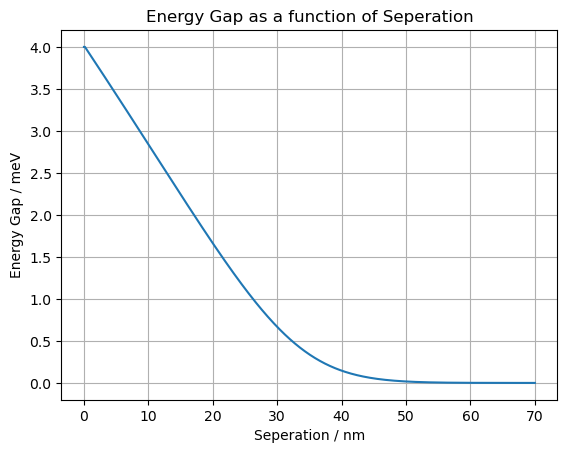

(None, None)

In [88]:
max_offset = 70
trials = 450
nodes = 1000

offset_range = np.linspace(0, max_offset, trials)

a = plot_to*2E-9/nodes
X = np.linspace(-plot_to*1E-9, plot_to*1E-9, nodes)

t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(nodes)
off=-t0*np.ones(nodes-1)

gaps = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
u, = ax1.plot([], label='$V(x)$')
psi_12, = ax1.plot([], label='$\Psi_1|^2$')
psi_22, = ax1.plot([], label='$|\Psi_2|^2$')

ax1.set_xlabel('$x$ / nm')
ax1.set_ylabel('Potential / eV')
ax1.set_xlim(-plot_to, plot_to)
ax1.set_ylim(0, 30)
ax1.set_title('Effect of Seperation on System')
ax1.legend(loc=9)
ax1.grid()

psi_1, = ax2.plot([], label='Re $\Psi_1$', color='orange')
psi_2, = ax2.plot([], label='Re $\Psi_2$', color='green')

ax2.grid();
ax2.set_ylabel('$\Psi$')
ax2.set_xlabel('x / nm')
ax2.legend()
ax2.set_title('Re $\Psi$ for $E_n$ s for Seperation = {} nm'.format(seperation//1))
ax2.set_yticklabels([])
ax2.set_xlim(-plot_to, plot_to)
ax2.set_ylim(-0.10, 0.10)


def animate(i):
    seperation = offset_range[i]
    
    U1 = (alpha*1E9)*(X-seperation*0.5E-9)**2
    U2 = (alpha*1E9)*(X+seperation*0.5E-9)**2
    U = np.minimum(U1, U2)

    H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

    # Solving the Matrix
    vals, vec = np.linalg.eigh(H)
    idx = vals.argsort()[::1]   
    vals = vals[idx]
    vec = vec[:,idx]
    
    Energy_gap=vals[1]-vals[0]
    gaps.append(Energy_gap)
    
    u.set_data(X*1E9, U*1E3)
    psi_1.set_data(X*1E9, (vec[:,0]))
    psi_2.set_data(X*1E9, (vec[:,1]))
    psi_12.set_data(X*1E9, (np.multiply(vec[:,0],vec[:,0]) + vals[0])*1E3)
    psi_22.set_data(X*1E9, (np.multiply(vec[:,1],vec[:,1]) + vals[1])*1E3)
    
    plt.suptitle('Seperation = {} nm'.format(round(seperation,2)))

plt.tight_layout()

anim = FuncAnimation(fig, animate, frames=trials, interval=30)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
    
fig2 = plt.figure()
plt.plot(offset_range, np.multiply(gaps[:-1], 1E3))
plt.xlabel('Seperation / nm')
plt.ylabel('Energy Gap / meV')
plt.title('Energy Gap as a function of Seperation')
plt.grid(), plt.show()

We can see two distinct 'modes'of interaction. When the dots are sufficiently dispersed, the wavefunctions are degenerate, and when they are too close, their is no degeneracy.

For our qunatum computing system, we wan't to finely control that degeneracy. We want wavefunctions that are controllably equally to be occupied but that are localised in different areas. This is to say, we want two Wavefunctions that are:

a) Degenerate, they should have the same (or very close) eigenvalues, and,
b) Are localised in different halves of double QD potential.

Clearly we want one of the weaker interactions to ensure the energy levels are close to degenerate, but we aren't getting the localisation that we want. To try and solve this, we will introduce another parameter to our potential:

$$
V (x) =  F x +  \text{min } \left\{
\begin{array}{ll}
      \alpha \times \left( x - \frac{\text{seperation}}{2} \right)^2 \\
      \alpha \times \left( x + \frac{\text{seperation}}{2} \right)^2 \\
\end{array} 
\right.
$$

Where $F$ is some applied field. The units here are arbitraty, but you would need to apply an eV to volts conversion and multiply by the charge of the electrons to get some resonable units (they would end up on the order of $\text{meV}$). Lets plot this statically for a select potential, and then watch it eveolve over a range of $F$.

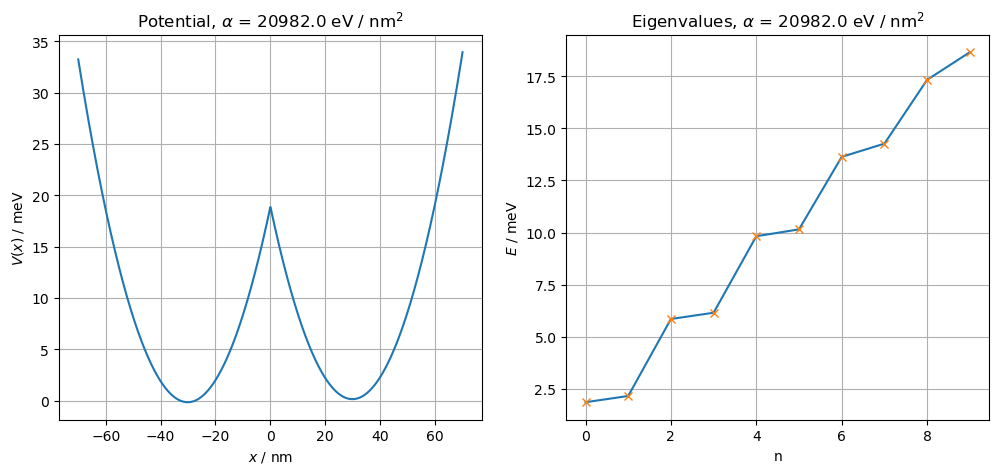

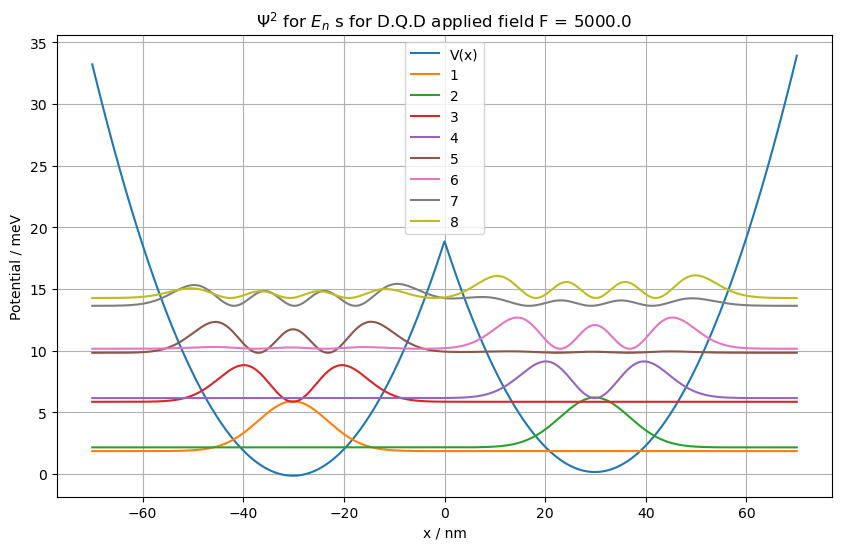

In [24]:
# DQD with electric field

# Bounds and nodes for grid
plot_to = 70 # Bounds in nm
nodes = 2000
alpha = alpha # 20982.008208404975 optimal
seperation = 60 # seperation of quadratics in nm
F =  5e3 #this is just the electric force per nm (i.e., Potential = F x), needs factors of q 

# Plot solutions to Psi over potential to check for issues, set to eigenvalue or 0 for nothing, recomend setting to at least 2
plot_check = 8

Bounds = np.multiply(plot_to, [-1e-9, 1e-9])
X = np.linspace(*Bounds, nodes)
a = plot_to*2E-9/nodes

U0 = np.multiply(F, X)
U1 = (alpha*1E9)*(X-seperation*0.5E-9)**2
U2 = (alpha*1E9)*(X+seperation*0.5E-9)**2
U = np.add(np.minimum(U1, U2), U0)

# Defining the Hamiltonian
t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(nodes)
off=-t0*np.ones(nodes-1)

H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

# Solving the Matrix
vals, vec = np.linalg.eigh(H)
idx = vals.argsort()[::1]   
vals = vals[idx]
vec = vec[:,idx]

#print eigenvalues and energy gaps
Energy_gap=vals[1]-vals[0]
#print('Energy Gap =', Energy_gap*1E3,' meV')

# Make Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(X*1E9, U*1E3)
ax1.set_xlabel('$x$ / nm')
ax1.set_ylabel('$V (x)$ / meV')
ax1.set_title('Potential, $\\alpha$ = {} eV / nm$^2$'.format(alpha//1)); ax1.grid()

ax2.plot(vals[:10]*1E3)
ax2.plot(vals[:10]*1E3, marker='x', linestyle='')
ax2.set_xlabel('n')
ax2.set_ylabel('$E$ / meV')
ax2.set_title('Eigenvalues, $\\alpha$ = {} eV / nm$^2$'.format(alpha//1)); ax2.grid()

if plot_check != 0:
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot(X*1E9, U*1E3, label='V(x)')
    for i in range(plot_check):
        plt.plot(X*1E9, (np.multiply(vec[:,i],vec[:,i]) + vals[i])*1E3, label='{}'.format(i+1))
    plt.grid()
    plt.ylabel('Potential / meV')
    plt.xlabel('x / nm')
    plt.legend()
    plt.title('$\Psi^2$ for $E_n$ s for D.Q.D applied field F = {}'.format(F))
    plt.show()

Clearly we have ticked both of those boxes with this particular selection of $F$. Lets see how the first two wavefunction change with a variable $F$, accross positive and negative values.

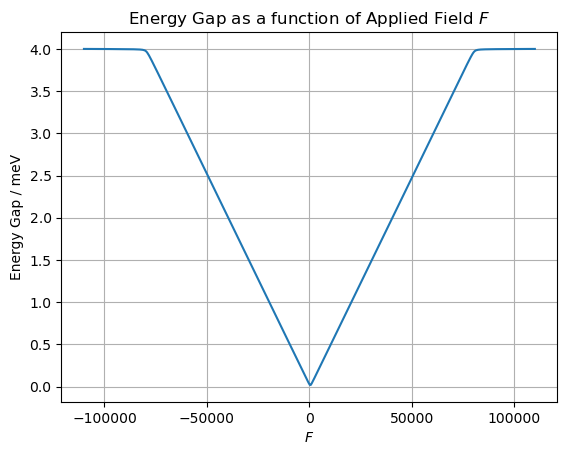

(None, None)

In [89]:
from matplotlib.animation import FuncAnimation
from IPython import display

F_min = -110000 #this is just the electric force per nm (i.e., Potential = F x), needs factors of q 
F_max =  110000
trials = 500
nodes = 1000

F_list = np.linspace(F_min, F_max, trials)
a = plot_to*2E-9/nodes

X = np.linspace(-plot_to*1E-9, plot_to*1E-9, nodes)

U1 = (alpha*1E9)*(X-seperation*0.5E-9)**2
U2 = (alpha*1E9)*(X+seperation*0.5E-9)**2
Un = np.minimum(U1, U2)

t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(nodes)
off=-t0*np.ones(nodes-1)

gaps = []

fig, axs = plt.subplots(figsize=(10,6))
u, = axs.plot([], label='$V(x)$')
psi_1, = axs.plot([], label='$|\Psi_1|^2$')
psi_2, = axs.plot([], label='$|\Psi_2|^2$')

axs.set_xlabel('$x$ / nm')
axs.set_ylabel('Potential / eV')
plt.xlim(-plot_to, plot_to)
plt.ylim(-4, 30)
axs.set_title('Effect of Changing Field on System')
axs.legend(loc=9)
axs.grid()

F_text = plt.text(-57, 28, 'x')

plt.tight_layout()  

def animate(i):
    
    F = F_list[i]
             
    U0 = np.multiply(F, X)
    U = np.add(Un, U0)

    H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

    vals, vec = np.linalg.eigh(H)
    idx = vals.argsort()[::1]   
    vals = vals[idx]
    vec = vec[:,idx]

    Energy_gap=vals[1]-vals[0]
    gaps.append(Energy_gap)

    u.set_data(X*1E9, U*1E3)
    psi_1.set_data(X*1E9, (np.multiply(vec[:,0],vec[:,0]) + vals[0])*1E3)
    psi_2.set_data(X*1E9, (np.multiply(vec[:,1],vec[:,1]) + vals[1])*1E3)
    
    F_text.set_text('Field Strength $F = $ {} $ \\times 10^3 $'.format(round(F*1E-3, 1)))
    

anim = FuncAnimation(fig, animate, frames=trials, interval=30)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
    
fig2 = plt.figure()
plt.plot(F_list, np.multiply(gaps[:-1], 1E3))
plt.xlabel('$F$')
plt.ylabel('Energy Gap / meV')
plt.title('Energy Gap as a function of Applied Field $F$')
plt.grid(), plt.show()

**Look Familiar?** This graph for the energy gap as a function of $F$ is incredibly similar to our graph for $t$ for our formal two-state system. We can conclude that $F$ is, like $t$, a detuning bias. This bias controls the localisation of the electron between the two qunatum dotes. 

For our Qunatum Computer, we want our eigenstates somewhere in that trench, where the desired localisation is achieved. Outside of the trench, our wavefunctions both move into the same parabolic space. Moving too close to the edges of the trench means that the energy gap between our wavefunctions of interest and the others is much lower, raising the chances of decoherance. 

The units for $F$ here are arbitrary. You would need several conversion factors to get them into something usable, and if you did we would expect them to be on the order of millivolts. 

### Part D: Rabi Oscillations & Time Evolution

Here we will redefine $\Psi_1$ and $\Psi_2$ to be the wavefunction localised in the left and right potential lobes respectively, whereas before we were defining them simply by the value of there corresponding Eigenvalue. This will give us some ability to map our readouts of probabilities.

We change the potential to include a time dependant potential:

$$
V (x) =  F x \cos \left( \omega t \right) +  \text{min } \left\{
\begin{array}{ll}
      \alpha \times \left( x - \frac{\text{seperation}}{2} \right)^2 \\
      \alpha \times \left( x + \frac{\text{seperation}}{2} \right)^2 \\
\end{array} 
\right.
$$

This means we now need to solve the time dependant Schrodinger Equation. Luckely, we can use seperation of variables to brake the wavefunction into spatial and time dependant components:

$$
\Psi = \psi(x) \cdot \psi(t)
$$

The solution at each moment in time will be the product of the spatial solution and the time dependant Schrodinger's equation, which has the following known form:

$$
\psi(t) = e^{-i \omega t}
$$

This is (by inspection) just some complex phasor (ie., a complex number with modulus 1). This means that none of our observables are changed with $t$ (apart from changes from the changing potential), but the wavefunction, $\Psi$, will 'rotate' in and out of the complex domain*.

So our solution for $\psi$ will be a spatial component, $\psi(x, t)$ - there is some $t$ dependance here becuase $V(x,t)$, and a time dependant component $\psi(t)$, which doesn't impact our observables because they are all real.

.* You can view this rotation on the following animation by changing plot_psi to false, this will plot $\text{Re } \Psi$ instead of $|\Psi|^2$

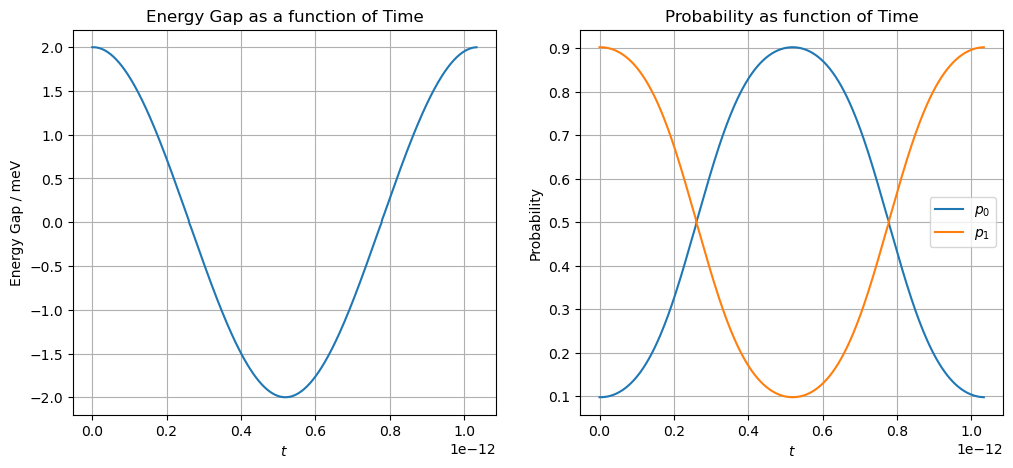

In [90]:
# If True, plots the real part of Psi rather than |Psi|^2. This shows the parts of the schrodingers equation from the time dependant part
# Everything still works identically with time dependance, vindication!
plot_psi = False
# there is a scale factor here that dissapears when you take the square 

trials = 400
nodes = 1000

F = 40000
omega = 0.004*q/hbar

t_list = np.linspace(0, 2*np.pi/omega, trials)
a = plot_to*2E-9/nodes
X = np.linspace(-plot_to*1E-9, plot_to*1E-9, nodes)

U1 = (alpha*1E9)*(X-seperation*0.5E-9)**2
U2 = (alpha*1E9)*(X+seperation*0.5E-9)**2
Un = np.minimum(U1, U2)

t0=(hbar*hbar)/(2*m*a*a)/q #divide by q to convert to eV
on=2.0*t0*np.ones(nodes)
off=-t0*np.ones(nodes-1)

gaps = []; p1s = []

fig, axs = plt.subplots(figsize=(10,6))
u, = axs.plot([], label='$V(x)$')

if plot_psi == False:
    psi_1, = axs.plot([], label='$|\Psi_1|^2$')
    psi_2, = axs.plot([], label='$|\Psi_2|^2$')
else:
    psi_1, = axs.plot([], label='$Re(\Psi_1)$')
    psi_2, = axs.plot([], label='$Re(\Psi_2)$')

axs.set_xlabel('$x$ / nm')
axs.set_ylabel('Potential / eV')
plt.xlim(-plot_to, plot_to)
plt.ylim(-4, 30)
axs.set_title('Effect of Rabi Oscillations on System')
axs.legend(loc=9)
plt.tight_layout()
axs.grid()             

def animate(i):
    
    t = t_list[i]
    U0 = np.multiply(F*np.cos(omega*t), X)
    U = np.add(Un, U0)

    H = np.diag(on+U) + np.diag(off,1) + np.diag(off,-1)

    vals, vec = np.linalg.eigh(H)
    idx = vals.argsort()[::1]   
    vals = vals[idx]
    vec = np.multiply(vec[:,idx], 1)#psi_t)
    
    if plot_psi == False:
        psi1 = (np.multiply(vec[:,0],vec[:,0]) + vals[0])*1E3
        psi2 = (np.multiply(vec[:,1],vec[:,1]) + vals[1])*1E3
    else:
        psi_t = np.exp(-1j*omega*t)
        psi1 = (np.multiply(0.07*vec[:,0],psi_t) + vals[0])*1E3
        psi2 = (np.multiply(0.07*vec[:,1],psi_t) + vals[1])*1E3
    
    if psi2.argmax() >= psi1.argmax():
        psi_1.set_data(X*1E9, psi1)
        psi_2.set_data(X*1E9, psi2)
        Energy_gap=vals[1]-vals[0]
        
        p1 = vals[0]**2/(vals[1]**2 + vals[0]**2)
        p1s.append(p1)
    else:
        psi_1.set_data(X*1E9, psi2)
        psi_2.set_data(X*1E9, psi1)
        Energy_gap=vals[0]-vals[1]
        
        p1 = vals[1]**2/(vals[1]**2 + vals[0]**2)
        p1s.append(p1)
    
    gaps.append(Energy_gap)
    u.set_data(X*1E9, U*1E3)

anim = FuncAnimation(fig, animate, frames=trials, interval=30)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
    
fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(12,5))
ax5.plot(t_list, np.multiply(gaps[:-1], 1E3))
ax5.set_xlabel('$t$')
ax5.set_ylabel('Energy Gap / meV')
ax5.set_title('Energy Gap as a function of Time')
ax5.grid()

ax6.plot(t_list, p1s[:-1], label='$p_0$')
ax6.plot(t_list, np.subtract(1, p1s)[:-1], label='$p_1$')
ax6.set_xlabel('$t$')
ax6.set_ylabel('Probability')
ax6.set_title('Probability as function of Time')
ax6.legend()
ax6.grid()

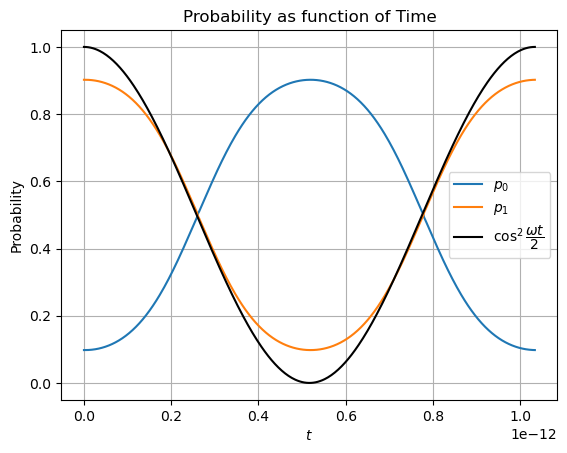

In [93]:
fig2, ax6 = plt.subplots()

ax6.plot(t_list, p1s[:-1], label='$p_0$')
ax6.plot(t_list, np.subtract(1, p1s)[:-1], label='$p_1$')
ax6.set_xlabel('$t$')
ax6.set_ylabel('Probability')
ax6.set_title('Probability as function of Time')
ax6.plot(t_list, np.cos(0.5*omega*t_list)**2, label='$\cos^2 \dfrac{\omega t}{2}$', color='black')

ax6.legend()
ax6.grid()

This very closely matches the theoretical $\cos^2 \left( \frac{\omega_R t}{2} \right)$ model, but there is clearly a dampening term here from our suboptimal selection of $F$. This matches with our theoretical two-state system nicely, where our selection of $t$ caused straining and squishing of the probability graph (and remember, our selection of $F$ is analogous to $t$).

Choosing a better value for $F$, such that we are teetering on the edge of the trench from before alleviates these issues, but pushing beyond that and we get some 'reverse dampening', where the functions 'squish up' against the ceiling and floor. I encourage you to play with it yourself.

### Part E: The Effective Mass Schrodinger's Equation - Extension

So far, we have been solving the Schrodinger's Equation using the time independant form (with seperation of variables when appropriate) using an effective mass term, $m^*$, to account for electrons in the electron sea of the silicon.

$$
- \frac{\hbar^2}{2 m^*} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi (x) = E \psi(x)
$$

We would be better off using a modified version of this equation, the *reduced mass* schrodingers equation. This still preserved that effective mass term, but introduces 



## Conclussion

---

### References 

[1] https://www.nature.com/articles/s41598-018-36476-z#:~:text=The%20quantum%20dots%20operated%20at,deep%20impurity%20levels%20in%20Si

[2] https://www.nature.com/articles/s41586-022-04706-0

https://www.nature.com/articles/nature15263

Kiczynski, M., Gorman, S.K., Geng, H., Donnelly, M.B., Chung, Y., He, Y., Keizer, J.G., Simmons, M.Y., 2022. Engineering topological states in atom-based semiconductor quantum dots. Nature 606, 694–699. https://doi.org/10.1038/s41586-022-04706-0

Ono, K., Mori, T., Moriyama, S., 2019. High-temperature operation of a silicon qubit. Sci Rep 9, 469. https://doi.org/10.1038/s41598-018-36476-z

Veldhorst, M., Yang, C.H., Hwang, J.C.C., Huang, W., Dehollain, J.P., Muhonen, J.T., Simmons, S., Laucht, A., Hudson, F.E., Itoh, K.M., Morello, A., Dzurak, A.S., 2015. A two-qubit logic gate in silicon. Nature 526, 410–414. https://doi.org/10.1038/nature15263

Yang, C.H., Leon, R.C.C., Hwang, J.C.C., Saraiva, A., Tanttu, T., Huang, W., Camirand Lemyre, J., Chan, K.W., Tan, K.Y., Hudson, F.E., Itoh, K.M., Morello, A., Pioro-Ladrière, M., Laucht, A., Dzurak, A.S., 2020. Operation of a silicon quantum processor unit cell above one kelvin. Nature 580, 350–354. https://doi.org/10.1038/s41586-020-2171-6

z8826307, 2022. Scientists emulate nature in quantum leap towards computers of the future [WWW Document]. UNSW Newsroom. URL https://newsroom.unsw.edu.au/news/science-tech/scientists-emulate-nature-quantum-leap-towards-computers-future (accessed 4.23.23).
